<a href="https://www.kaggle.com/code/kusumakar/earthquake-eda?scriptVersionId=199334477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recent-earthquakes/earthquakes.csv
/kaggle/input/recent-earthquakes/earthquakes_column_descriptors.txt


In [2]:
df = pd.read_csv("/kaggle/input/recent-earthquakes/earthquakes.csv")

In [3]:
df.head(1).to_dict()

{'id': {0: 'us7000necw'},
 'magnitude': {0: 4.8},
 'type': {0: 'earthquake'},
 'title': {0: 'M 4.8 - 33 km WSW of Ackerly, Texas'},
 'date': {0: '2024-09-17T00:49:42'},
 'time': {0: 1726534182289},
 'updated': {0: 1726583895255},
 'url': {0: 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000necw'},
 'detailUrl': {0: 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000necw.geojson'},
 'felt': {0: 1893},
 'cdi': {0: 6},
 'mmi': {0: 5},
 'alert': {0: 'green'},
 'status': {0: 'reviewed'},
 'tsunami': {0: 0},
 'sig': {0: 994},
 'net': {0: 'us'},
 'code': {0: '7000necw'},
 'ids': {0: ',us7000necw,tx2024shcj,'},
 'sources': {0: ',us,tx,'},
 'types': {0: ',dyfi,ground-failure,losspager,moment-tensor,oaf,origin,phase-data,shakemap,'},
 'nst': {0: 37},
 'dmin': {0: 0.287},
 'rms': {0: 0.48},
 'gap': {0: 70.0},
 'magType': {0: 'mww'},
 'geometryType': {0: 'Point'},
 'depth': {0: 4.044},
 'latitude': {0: 32.3984},
 'longitude': {0: -102.044},
 'place': {0: '33 km WSW of Ackerly,

In [4]:
# Take important features

features = ['magnitude','date',]

In [5]:
print(open("/kaggle/input/recent-earthquakes/earthquakes_column_descriptors.txt").read())

Column Descriptors:
id: Unique identifier for each earthquake event.
magnitude: The strength of the earthquake on the Richter scale.
type: Type of seismic event (earthquake, explosion, etc.).
title: Title of the earthquake event (place and magnitude).
date: Date when the earthquake occurred.
time: Time when the earthquake occurred.
updated: Last updated timestamp for the event.
url: Link to the earthquake event's details.
detailUrl: Additional details URL.
felt: Number of people who reported feeling the earthquake.
cdi: Community Determined Intensity, how strongly the event was felt.
mmi: Modified Mercalli Intensity, scale used to measure earthquake intensity.
alert: Alert level (green, yellow, orange, red).
status: Status of the event (reviewed, automatic).
tsunami: Tsunami risk flag (0 = no risk, 1 = risk).
sig: Significance of the earthquake, based on magnitude and impact.
net: Network that detected the earthquake.
code: Code assigned by the network.
ids: IDs of other events related

In [6]:
df['Count']=1

# Top 10 Earthquake prone Cities

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='city', ylabel='Count'>

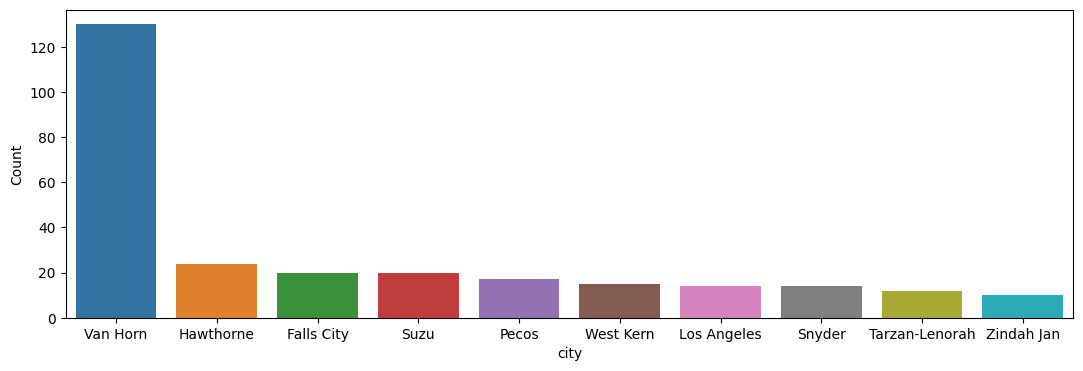

In [8]:
df2=df.groupby(["city"]).agg({"Count":"count"}).reset_index().sort_values(by="Count",ascending=False)
plt.figure(figsize=(13,4))

sns.barplot(x='city',y='Count',data=df2.head(10))

In [9]:
df.magnitude.unique()

array([4.8 , 5.1 , 3.7 , 3.9 , 4.1 , 3.23, 3.43, 3.44, 4.69, 3.5 , 3.8 ,
       3.3 , 3.35, 3.94, 3.45, 3.09, 4.28, 3.17, 3.47, 3.32, 3.1 , 3.  ,
       3.46, 3.14, 3.4 , 3.6 , 3.31, 3.2 , 4.3 , 4.2 , 3.29, 3.61, 4.4 ,
       4.39, 3.66, 4.44, 3.78, 3.64, 3.58, 4.06, 3.22, 4.6 , 5.22, 3.12,
       3.51, 4.89, 4.47, 4.5 , 4.  , 3.56, 3.48, 3.01, 5.2 , 6.4 , 5.7 ,
       5.4 , 5.9 , 5.5 , 5.6 , 5.3 , 5.8 , 7.  , 4.9 , 6.1 , 6.5 , 7.1 ,
       5.  , 6.3 , 7.4 , 6.2 , 7.5 , 6.  , 6.6 , 4.7 , 3.86, 3.24, 4.09,
       3.59, 6.8 , 6.7 , 6.9 , 7.6 , 5.06, 7.2 , 4.26, 3.68])

### Categorize Richter Scale

In [10]:
def map_scale(x):
    if x>=1 and x<2:
        return "Light"
    if x>=2 and x<4:
        return "Minor"
    if x>=4 and x<5:
        return "Light"
    if x>=5 and x<6:
        return "Moderate"
    if x>=6 and x<7:
        return "Strong"
    if x>=7 and x<8:
        return "Major"
    if x>=8 :
        return "Great"

In [11]:
df['magnitude']=df['magnitude'].apply(lambda s:map_scale(s))

In [12]:
df3=df.groupby(['city','magnitude']).agg({"Count":"count"}).reset_index().sort_values(by="magnitude",ascending=False)

# TOP CITIES THAT HAD MAJOR EARTHQUAKES

<Axes: xlabel='magnitude', ylabel='Count'>

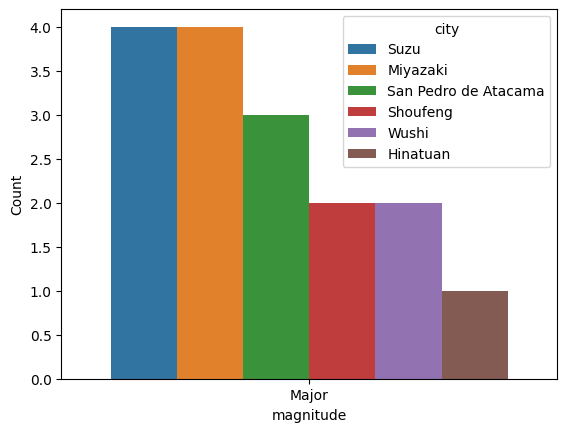

In [13]:
sns.barplot(x="magnitude",y="Count",hue="city",data=df3[df3.magnitude=="Major"].sort_values(by="Count",ascending=False))

# TOP CITIES THAT HAD STRONG EARTHQUAKES

<Axes: xlabel='magnitude', ylabel='Count'>

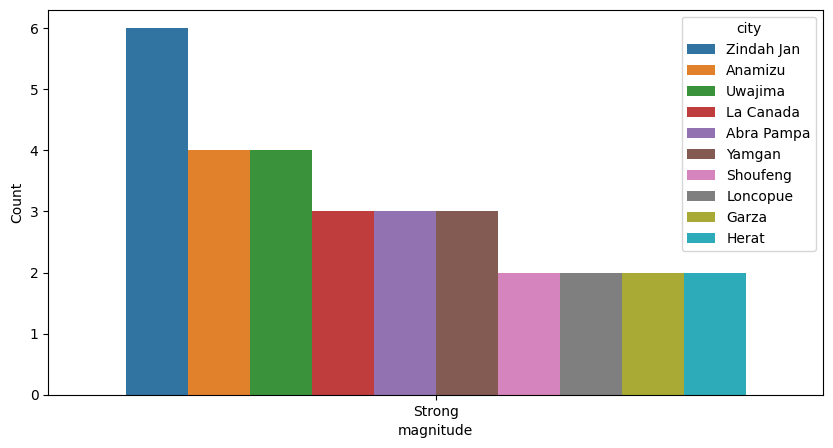

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x="magnitude",y="Count",hue="city",data=df3[df3.magnitude=="Strong"].sort_values(by="Count",ascending=False).head(10))

## TOP CITIES HAVING MODERATE EARTHQUAKES

<Axes: xlabel='magnitude', ylabel='Count'>

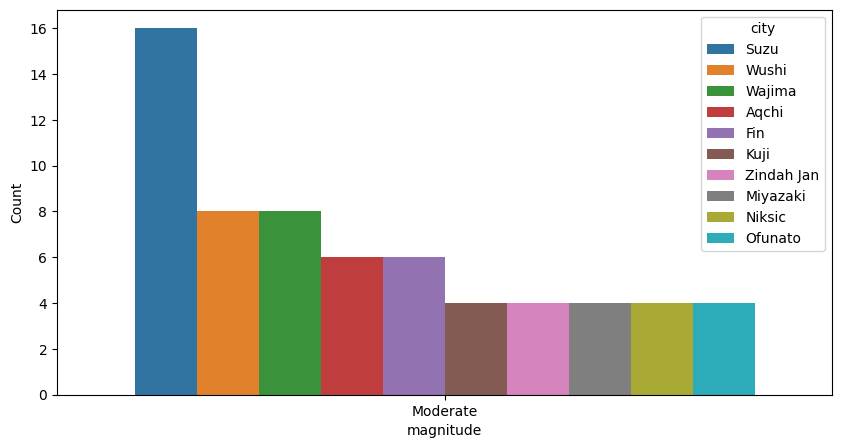

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x="magnitude",y="Count",hue="city",data=df3[df3.magnitude=="Moderate"].sort_values(by="Count",ascending=False).head(10))

# FREQUENCY ACROSS PREVIOUS YEARS

In [16]:
df['Year']=pd.to_datetime(df['date']).dt.year

/tmp/ipykernel_18/2875760515.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3=df.groupby(["Year","city"]).agg({"Count":sum}).reset_index().sort_values(by="Count",ascending=False).head(30)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupi

<Axes: xlabel='city', ylabel='Count'>

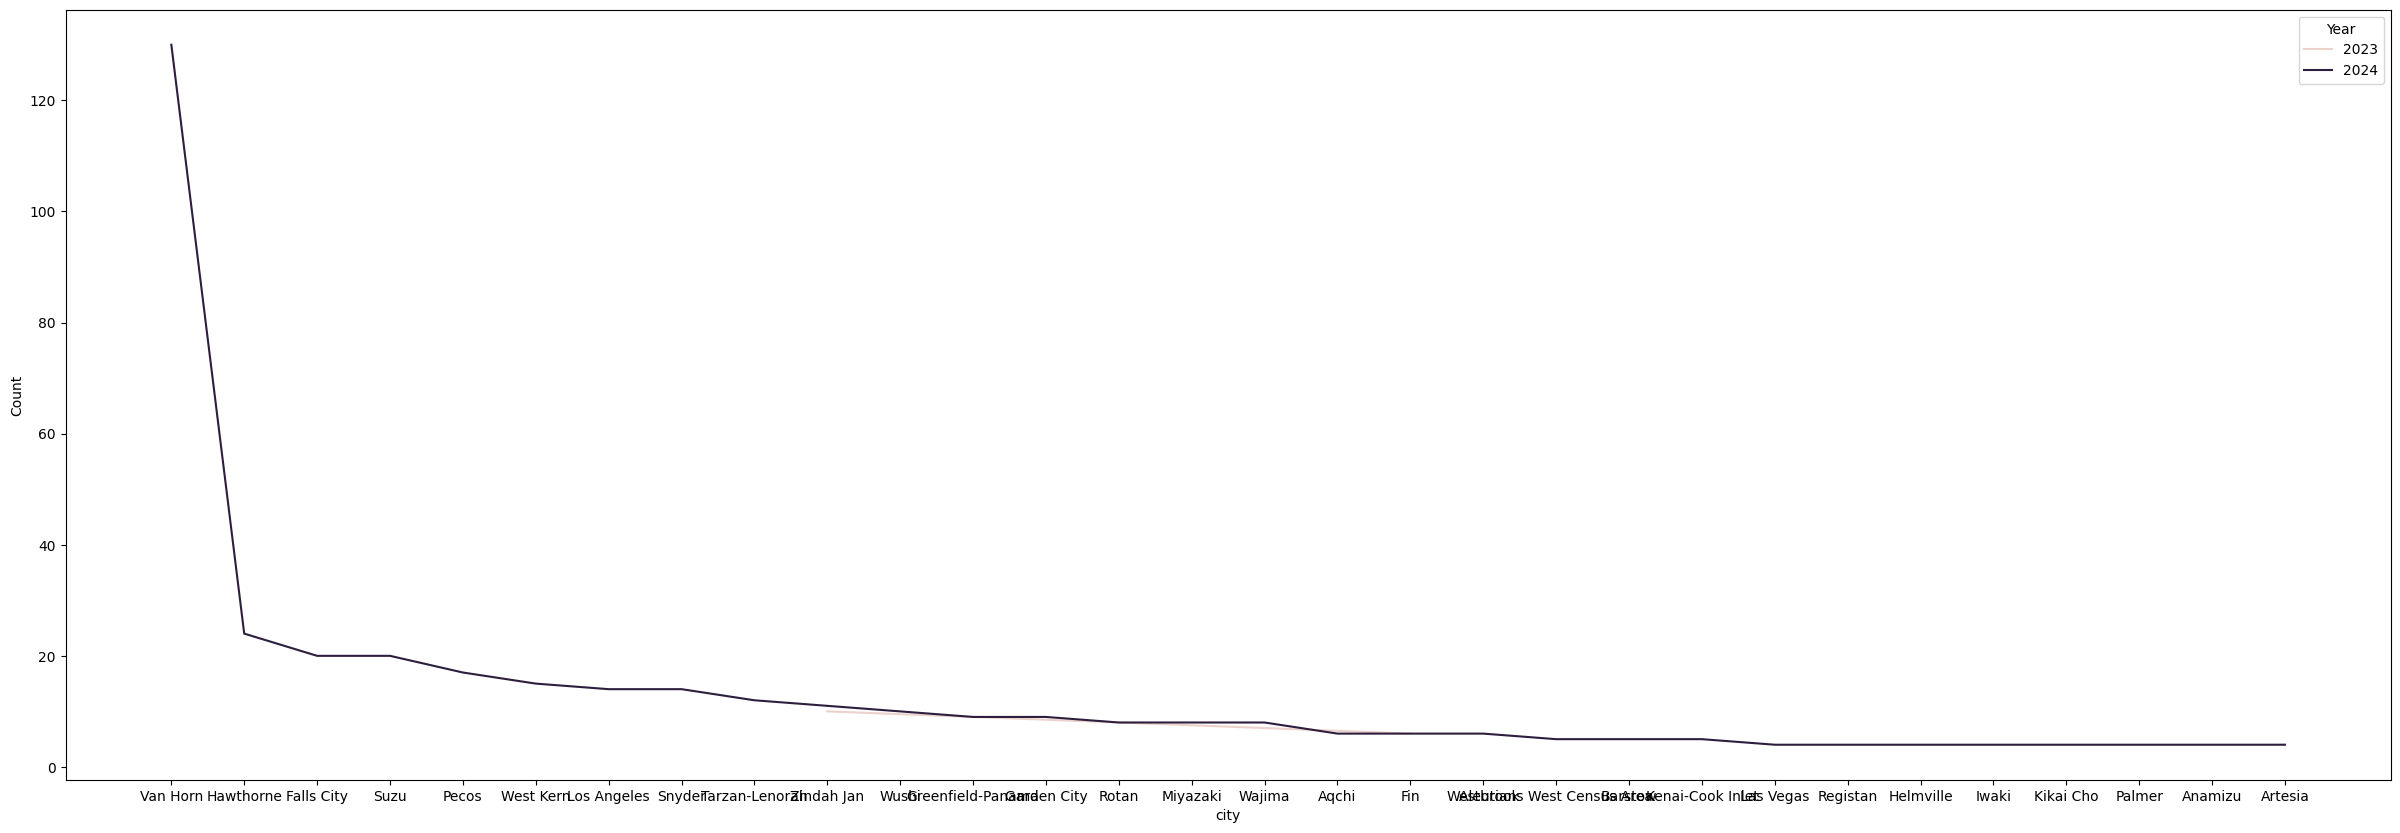

In [17]:
df3=df.groupby(["Year","city"]).agg({"Count":sum}).reset_index().sort_values(by="Count",ascending=False).head(30)
plt.figure(figsize=(30,10))
sns.lineplot(x="city",y="Count",hue="Year",data=df3)

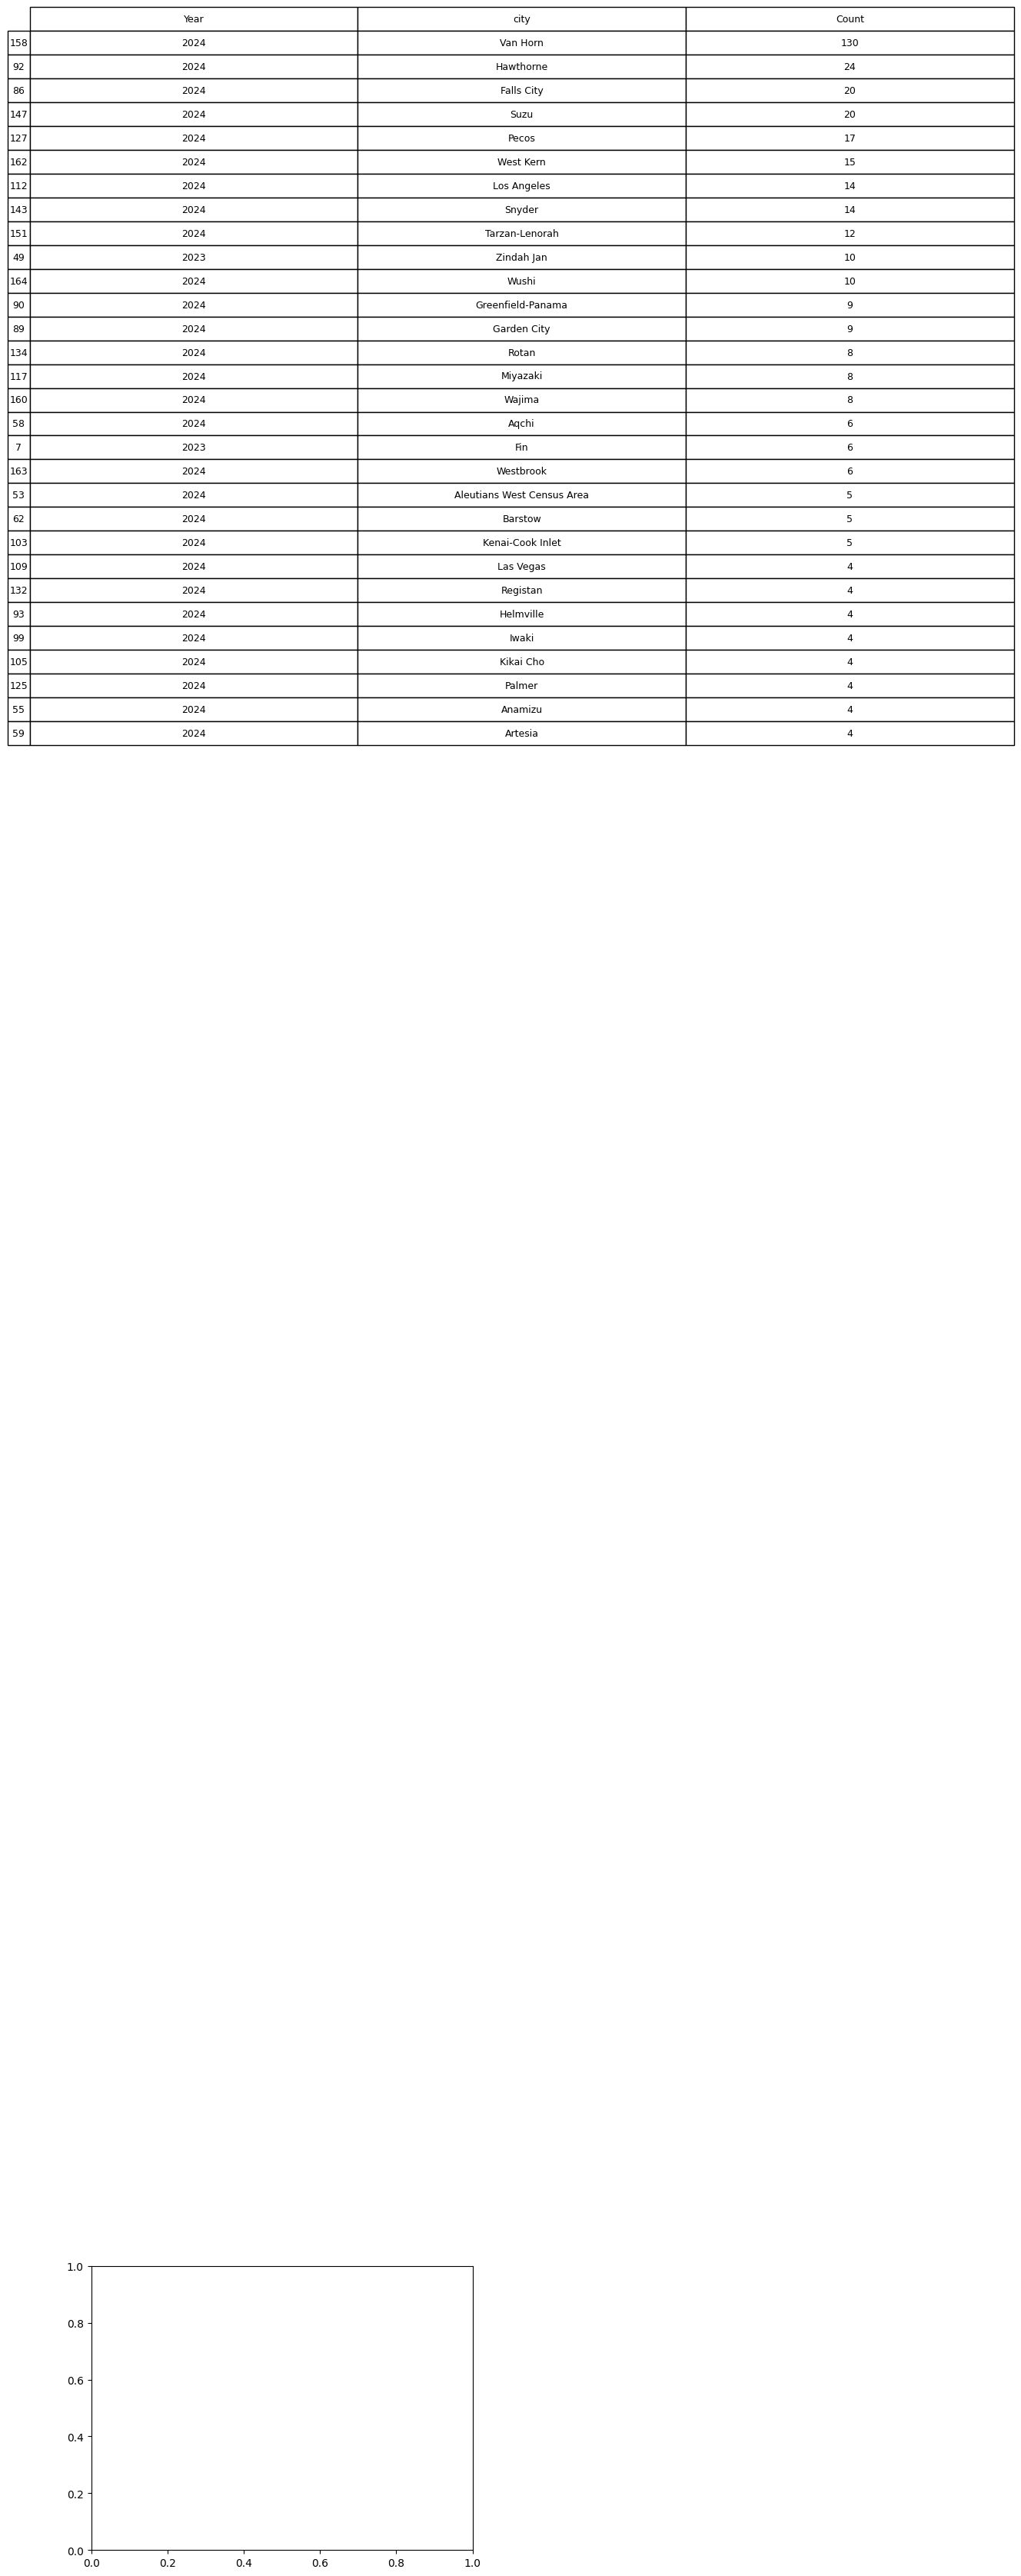

In [18]:
plt.table(cellText=df3.values,
          rowLabels=df3.index,
          colLabels=df3.columns,
          cellLoc = 'center', rowLoc = 'center',
          transform=plt.gcf().transFigure,
          bbox = ([0, 5, 2, 2]))